# Jordan Notebook - EDA

- Author: [Jordan](https://github.com/JfromNWMS/)
- Repository: [datafun-04-eda](https://github.com/JfromNWMS/datafun-04-eda)

### Section 1. Imports

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.axes import Axes
from pingouin import qqplot

### Section 2. Load Data

In [14]:
iris_df: pd.DataFrame = sns.load_dataset('iris')
iris_df.columns
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Section 3. Initial Data Inspection

In [15]:
iris_df.head(10)
iris_df.shape
iris_df.dtypes
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Section 4. Initial Descriptive Statistics

In [16]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Section 5.  Initial Data Distribution for Numerical Columns

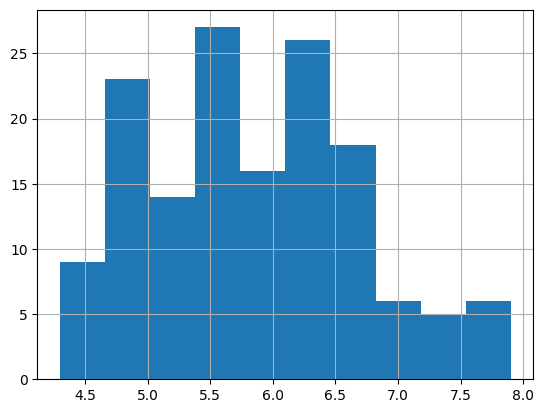

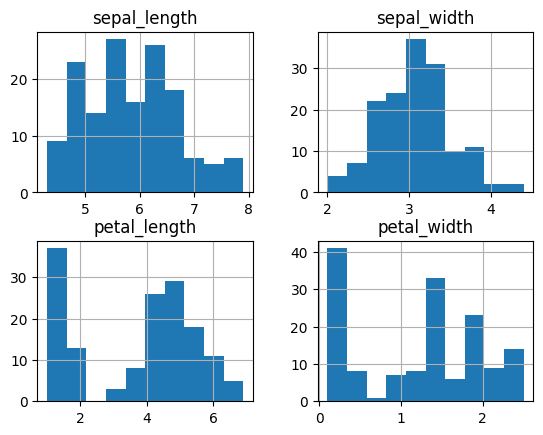

In [17]:
iris_df['sepal_length'].hist()
iris_df.hist()
matplotlib.pyplot.show()

Inspection of the histograms of the four groups reveals that the sepal_length and sepal_width appears to roughly follow a normal distribution with width showing a stronger tendancy.  The distribution of petal_length measurements also has a normal trend for the larger petal lengths though there is a high frequency for very small petal lengths.  The histogram of petal_width shows a high frequency for very small widths and a decreasing tend in frequency as petal_width increases.

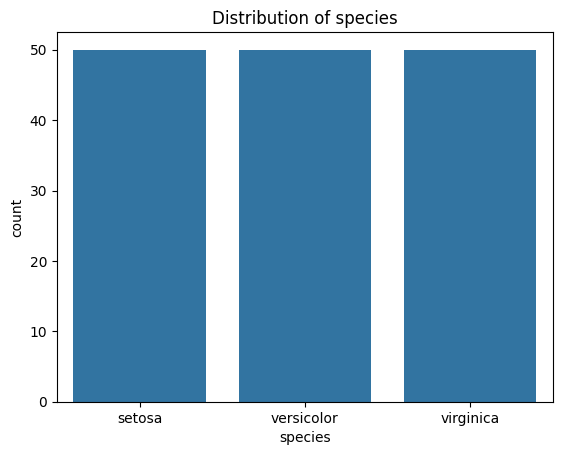

In [18]:
iris_df['species'].value_counts()

for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

matplotlib.pyplot.show()

Inspection of the frequency distribution plot for flower species shows that all three species of flowers each have fifty observations.

### Section 6. Initial Data Transformation and Feature Engineering

In [19]:
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']


### Section 7. Initial Visualizations

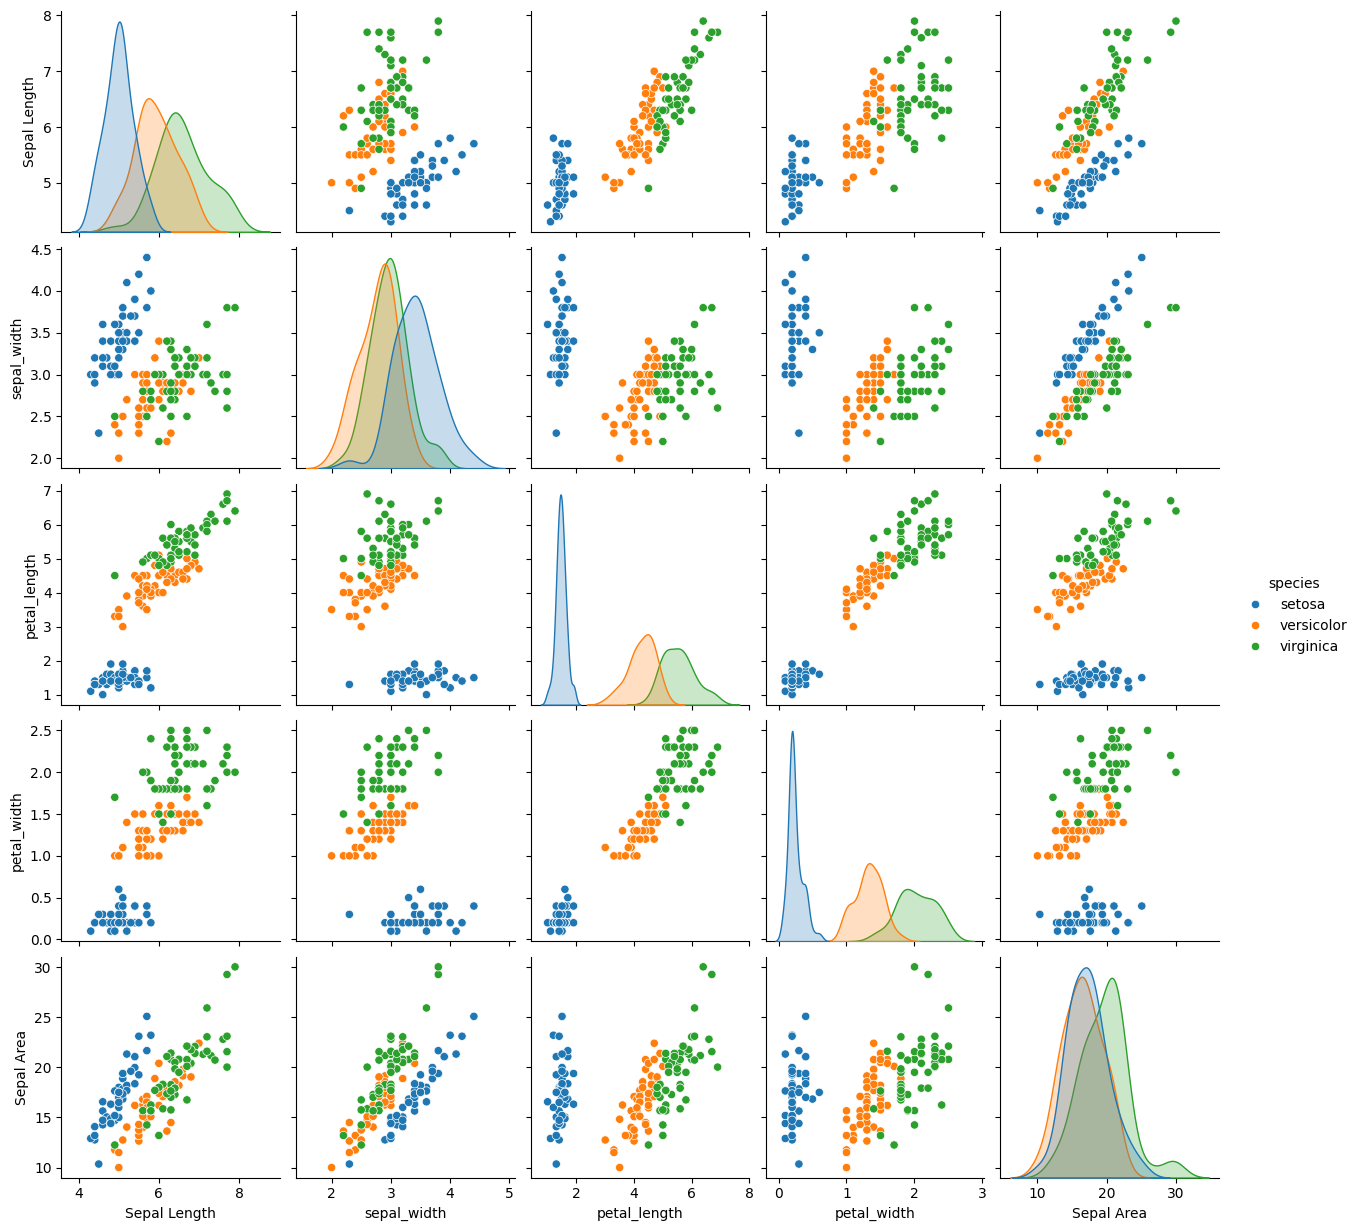

In [20]:
sns.pairplot(iris_df, hue='species')
matplotlib.pyplot.show()

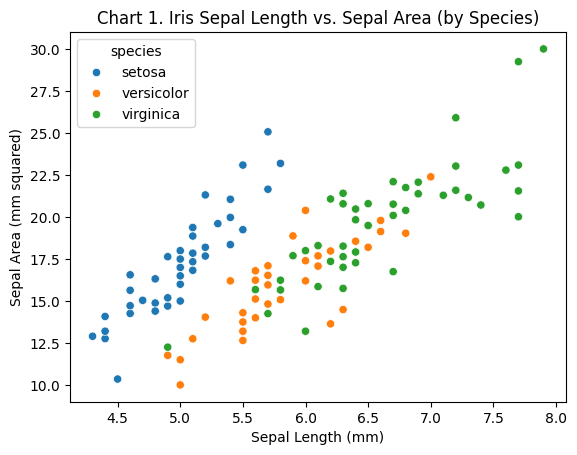

In [21]:
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)

scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

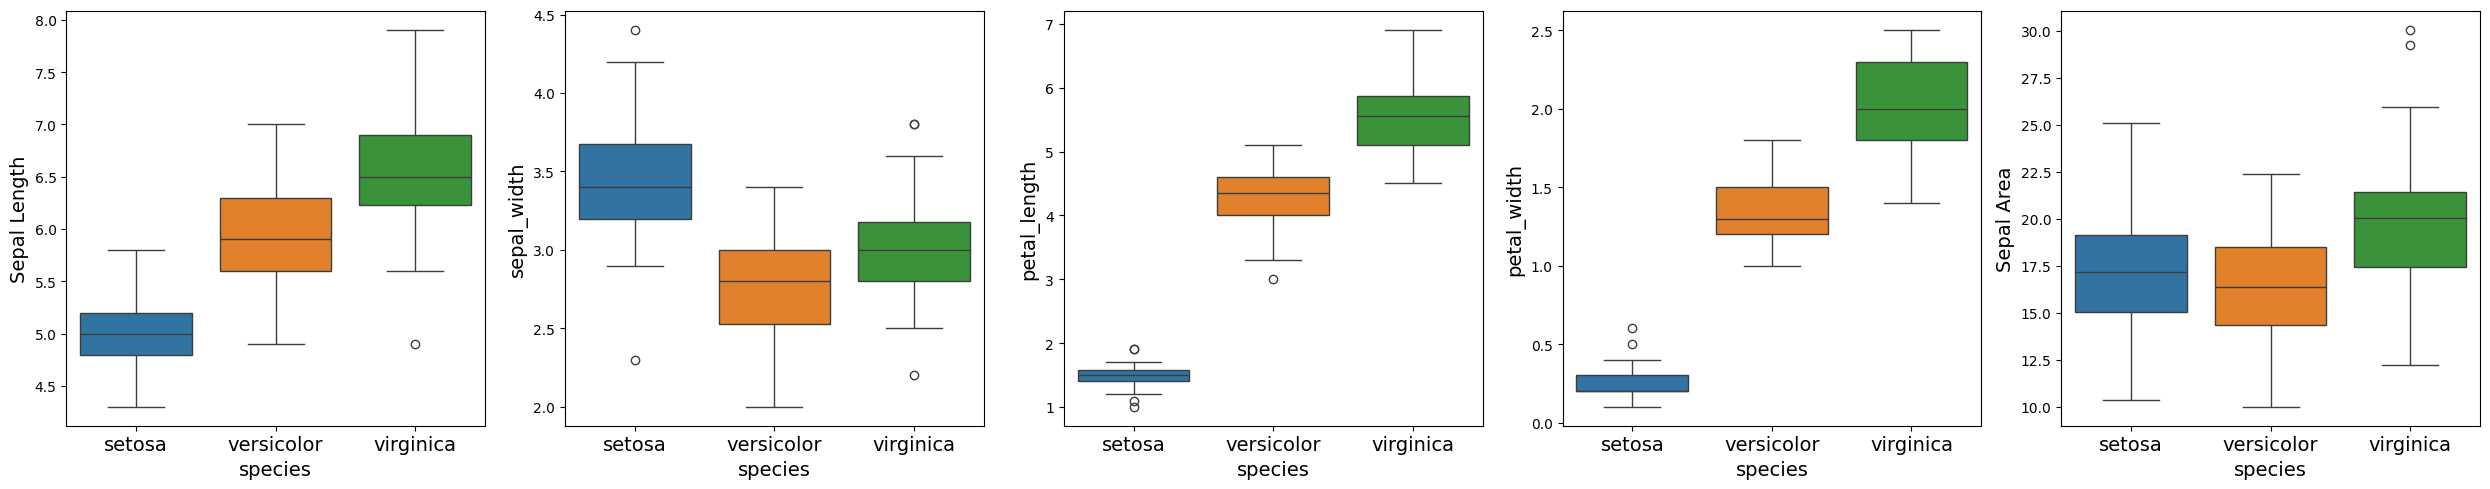

In [35]:
import jmod
from importlib import reload
reload(jmod)

jmod.multi_boxplot(x='species', data=iris_df)

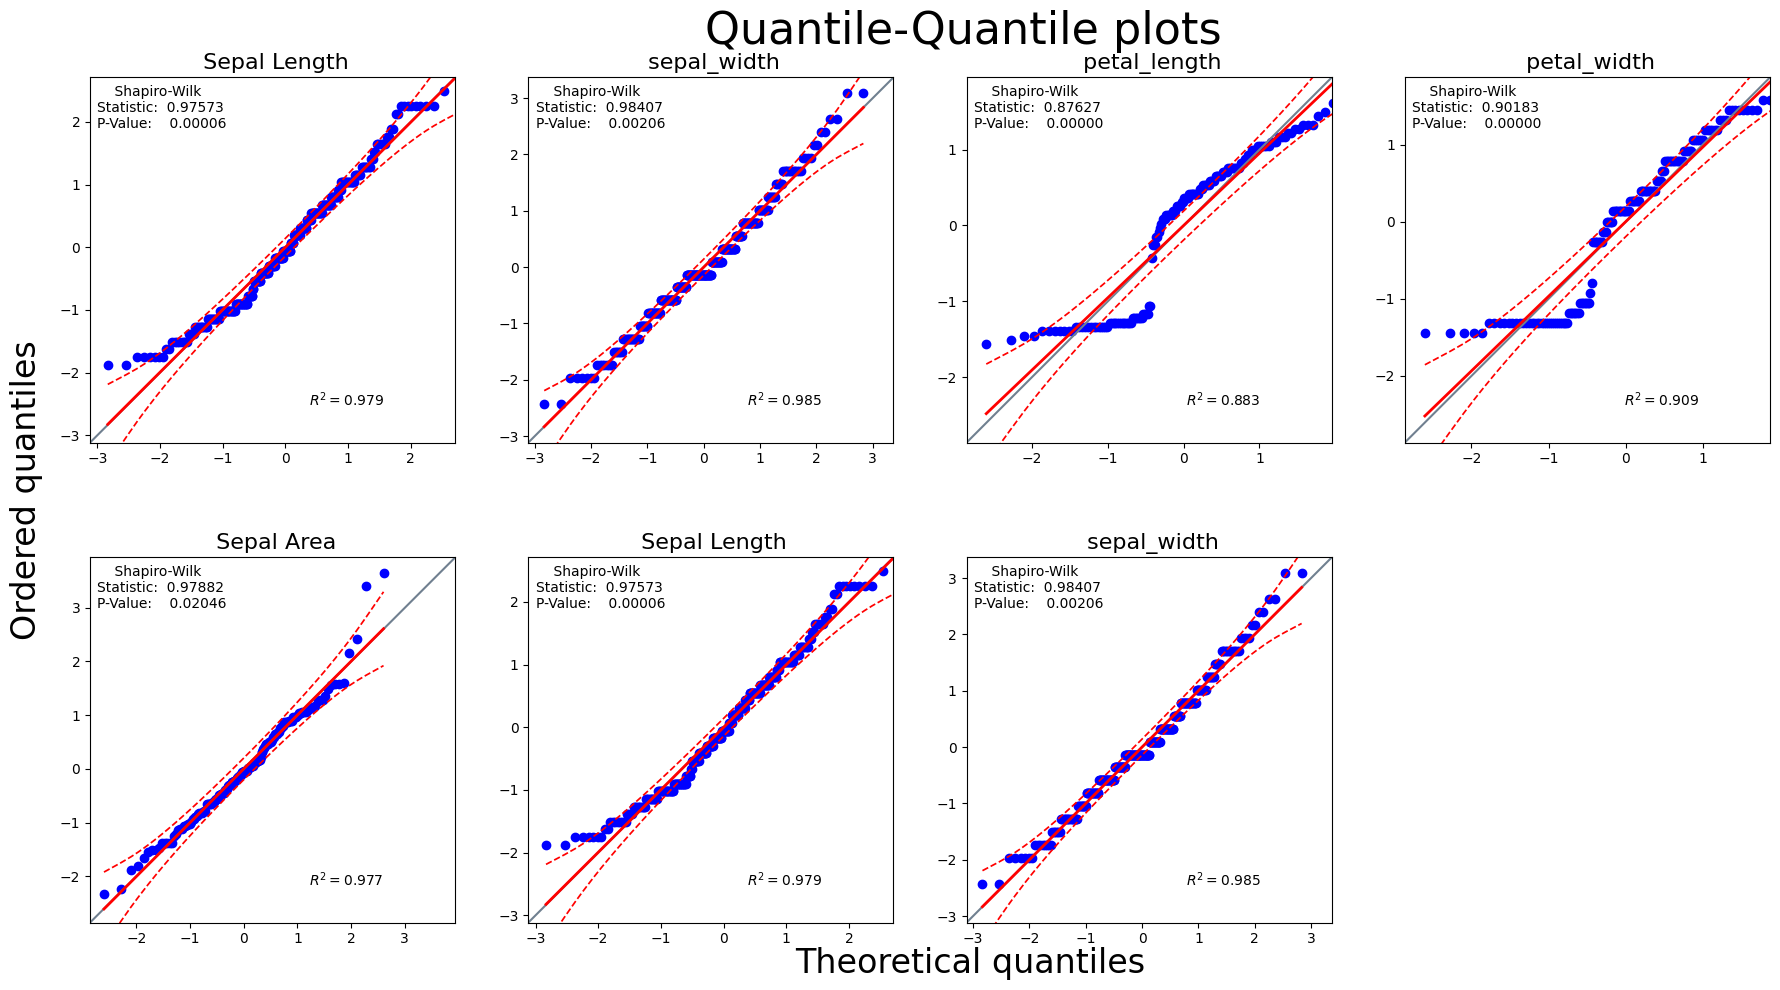

In [39]:
reload(jmod)
iris_ns = iris_df.drop('species', axis=1)
#jmod.is_norm(iris_df.drop('species', axis=1))

test_df = pd.concat([iris_ns, iris_ns.iloc[:,0:2]], axis=1)
jmod.is_norm(test_df)

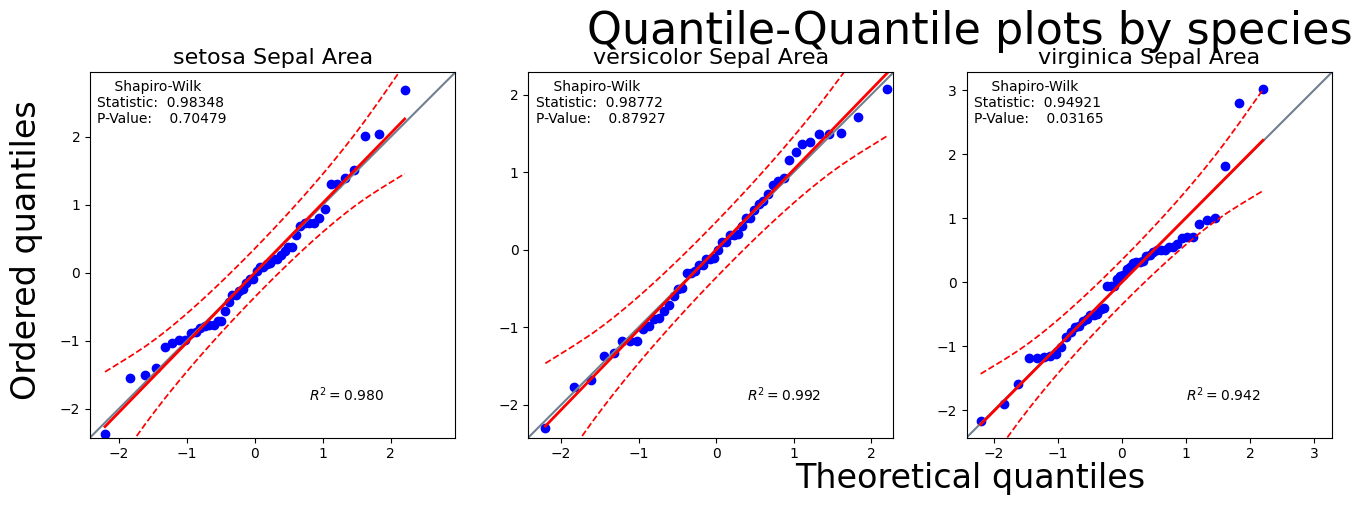

In [38]:
reload(jmod)
jmod.is_norm(data=iris_df.iloc[:,-2:], by='species')


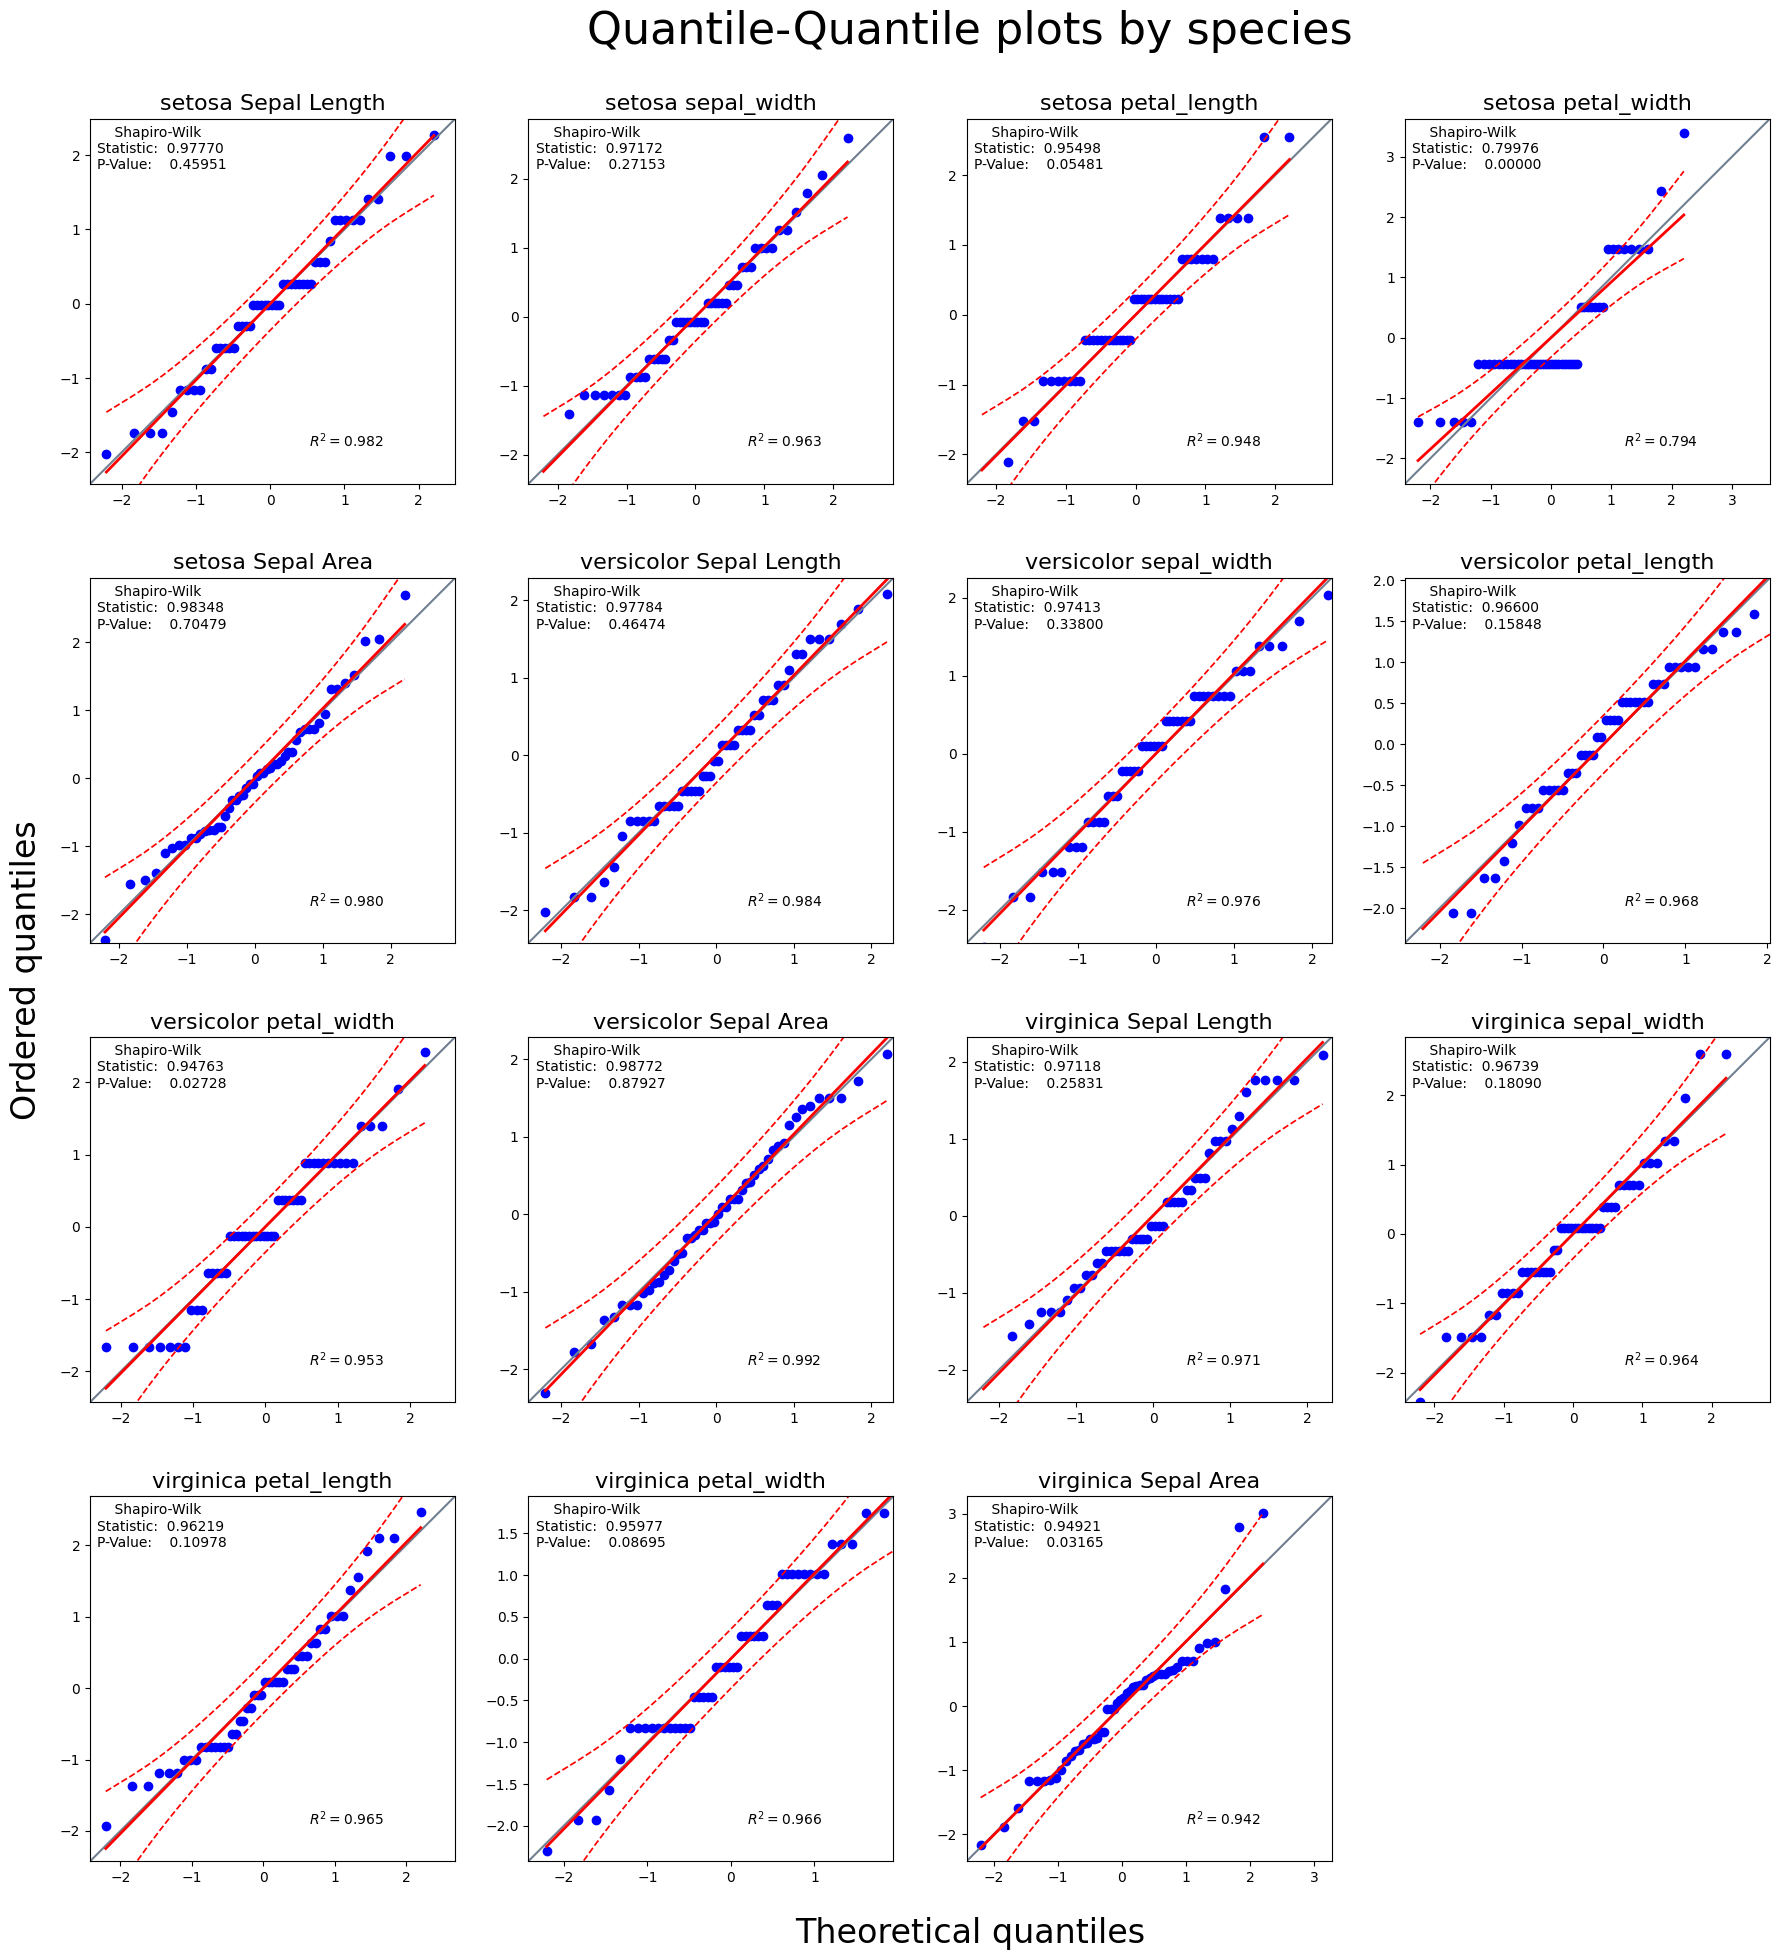

In [42]:
reload(jmod)
jmod.is_norm(iris_df, 'species', ncol_fig=4)